In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv('final_descriptors.csv')
df.dropna(axis=0, inplace=True)
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.277519,13.277519,0.036389,-0.511565,0.489318,12.550000,266.231,259.175,266.049156,96,...,0,0,0,0,0,0,0,0,0,0
1,12.817228,12.817228,0.033613,-0.447936,0.610144,18.434783,373.246,356.110,372.036107,118,...,0,0,0,0,0,0,0,0,0,0
2,12.567572,12.567572,0.144414,-0.250445,0.498010,12.550000,282.686,275.630,282.019605,96,...,0,0,0,0,0,0,0,0,0,0
3,10.155652,10.155652,0.227007,0.227007,0.415814,11.500000,310.356,296.244,310.110613,114,...,0,0,0,0,0,0,0,0,0,0
4,13.331481,13.331481,0.056111,-0.854630,0.573824,10.466667,208.148,203.108,208.028420,76,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,10.019296,10.019296,0.163353,-0.163353,0.811838,23.684211,324.222,306.078,323.063324,102,...,0,0,0,0,0,0,0,0,0,0
756,4.081375,4.081375,0.593456,0.593456,0.815194,19.941176,295.184,280.064,294.048009,90,...,0,0,0,0,0,0,0,0,0,0
757,12.755531,12.755531,0.005596,-0.567519,0.819410,18.391304,310.349,292.205,310.120509,118,...,0,0,0,0,0,0,0,0,0,0
758,12.958814,12.958814,0.025877,-0.562666,0.331791,11.555556,271.639,264.583,271.027230,94,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x_scaled = StandardScaler().fit_transform(df)

In [30]:
pca = PCA(n_components=100)

In [31]:
pca.fit_transform(x_scaled)

array([[-3.07859640e+00,  4.05957791e+00,  1.35552772e+00, ...,
        -6.57905087e-02, -1.69365760e-01,  2.99708366e-02],
       [ 2.52319462e+00,  6.91630370e+00, -2.01554355e+00, ...,
         3.53898209e-02,  1.74443588e-01,  3.29505681e-01],
       [-3.20886949e+00,  3.77189500e+00, -9.48880847e-02, ...,
        -4.57455536e-02, -1.41265137e-01,  9.05599586e-03],
       ...,
       [ 2.01536882e+00,  7.97947454e+00, -2.96199187e-01, ...,
        -8.80559432e-02,  2.52186664e-02,  2.80350935e-01],
       [-6.23942105e+00, -3.30618884e+00,  4.61878392e+00, ...,
         1.48445637e-01, -2.80129609e-01, -1.51449004e-01],
       [-2.85052840e+00,  3.91361932e+00, -2.24638354e-01, ...,
        -1.26937378e-01, -7.39501665e-02,  7.36309273e-03]])

In [32]:
nums = np.arange(60)

In [33]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit_transform(x_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

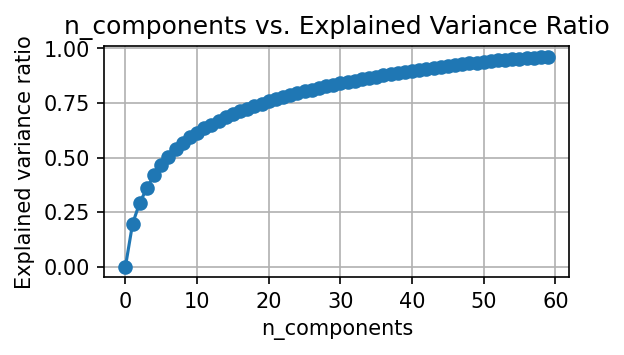

In [34]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [35]:
columns = list(df.columns)

In [36]:
val = np.abs(pca.components_[0, :])

In [37]:
mydict = {}
for i in range(187):
    mydict[columns[i]] = val[i]

In [38]:
ss = sorted(mydict.items(), key = lambda x: x[1], reverse=True)

In [39]:
#Do not use the sort method, because it does not return any and sorts inplace. "val.sort()"

In [40]:
ss = dict(ss[0:60])

In [41]:
df_new = df[ss.keys()]
df_new

,NumValenceElectrons,Chi0,HeavyAtomCount,Chi0n,Chi1,LabuteASA,Chi1n,Kappa1,Chi0v,Chi1v,...,NumHAcceptors,SlogP_VSA3,SMR_VSA6,EState_VSA1,NumAliphaticRings,BCUT2D_MWLOW,PEOE_VSA14,PEOE_VSA8,SMR_VSA7,NumSaturatedHeterocycles
0,96,13.853007,20,10.130340,9.664704,111.667120,6.030649,11.044292,10.130340,6.030649,...,4,0.000000,0.000000,11.600466,1,10.127063,0.000000,0.000000,70.023450,0
1,118,16.516143,23,13.378730,10.826204,142.746235,7.873269,14.883582,14.964727,8.666267,...,3,11.835812,0.000000,11.566490,2,9.689645,0.000000,16.690354,44.619507,0
2,96,13.853007,20,10.130340,9.664704,117.804851,6.030649,11.373646,10.886269,6.408613,...,4,0.000000,0.000000,0.000000,1,10.132462,0.000000,5.022633,69.228863,0
3,114,16.095647,24,12.822630,11.826500,137.756533,7.902871,13.140470,12.822630,7.902871,...,2,0.000000,0.000000,0.000000,0,10.000957,0.000000,10.772448,72.796405,0
4,76,10.999636,15,7.345503,7.109061,82.945461,4.015842,9.320269,7.345503,4.015842,...,4,0.000000,0.000000,22.177430,0,10.148065,5.687386,11.583068,40.327484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,102,13.242276,19,10.694677,9.254020,120.270737,6.789977,12.938371,12.280673,7.582975,...,3,0.000000,11.861545,0.000000,1,9.862968,0.000000,22.321606,22.802297,0
756,90,11.664926,17,9.463006,8.326500,108.296481,5.926442,11.045231,11.049003,6.719440,...,3,0.000000,18.406301,0.000000,1,10.166196,0.000000,28.132927,22.802297,1
757,118,16.353007,23,13.232436,10.953526,133.672921,7.924321,14.395932,13.232436,7.924321,...,4,18.442694,0.000000,11.566490,2,9.689526,0.000000,16.690354,46.213155,0
758,94,13.120956,18,8.762433,8.613392,104.991927,4.640642,12.116052,9.518362,5.018607,...,6,0.000000,11.050456,5.817221,0,10.262000,0.000000,5.687386,34.732883,0


In [124]:
df_new.to_csv('pca_sltd_descriptors.csv')

In [42]:
target = pd.read_csv('multitarget.csv')
target

,ido_tdo
0,AA
1,II
2,AI
3,II
4,II
...,...
752,II
753,II
754,IA
755,AI


In [43]:
encoder = LabelEncoder()

In [44]:
y_labeled = encoder.fit_transform(target['ido_tdo'])

In [45]:
y_labeled

array([0, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 3, 0, 0, 1,
       3, 0, 2, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 3,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0,
       3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 0, 0, 3,
       3, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 2, 0, 1, 3, 1, 0, 0, 3, 3, 0, 0,
       2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 3, 0,

In [46]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(x_scaled)
reduced_data.shape

(757, 10)

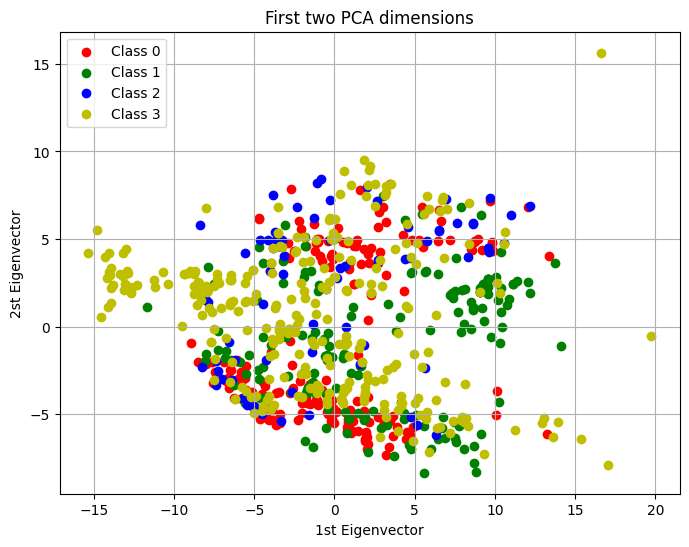

In [47]:
plt.figure(figsize=(8, 6))
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    plt.scatter(reduced_data[y_labeled == i, 0], reduced_data[y_labeled == i, 1], c=c, label=f'Class {i}')
plt.title('First two PCA dimensions')
plt.xlabel('1st Eigenvector')
plt.ylabel('2st Eigenvector')
plt.legend()
plt.grid(True)

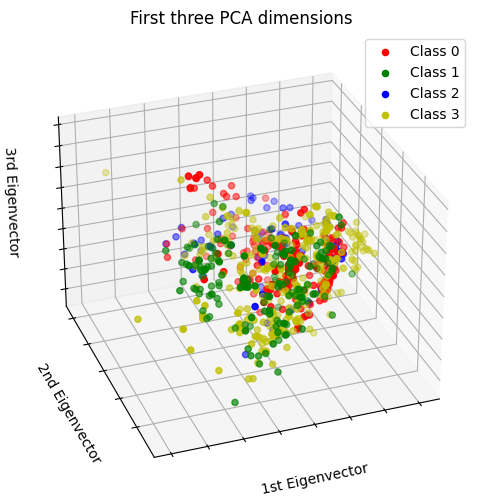

In [48]:
f = plt.figure(1, figsize=(8, 6))
ax = f.add_subplot(111, projection="3d", elev=-150, azim=110)
for i, c in zip(np.unique(y_labeled), ['r', 'g', 'b', 'y']):
    ax.scatter(reduced_data[y_labeled == i,0], reduced_data[y_labeled == i,1], reduced_data[y_labeled == i,2], c=c, label=f'Class {i}')

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
plt.legend();